#  <span style="color:purple">Datos Para Variables</span> 

Katherin Johana Martinez Gazabon

In [49]:

using Random
using Statistics
using DataFrames
using Distributions: Normal, Poisson
using Plots
using StatsPlots
using StatsBase: countmap

Random.seed!(2388075)


TaskLocalRNG()

El código importa librerías para trabajar con datos y estadísticas.
Random genera números aleatorios y Random.seed!(2388075) fija la semilla para obtener siempre los mismos resultados.
Statistics aporta medidas como media y desviación.
DataFrames organiza los datos en tablas.
Distributions carga las distribuciones Normal y Poisson para simular datos.
Plots y StatsPlots permiten graficar, incluso directamente desde tablas.
countmap de StatsBase sirve para contar frecuencias de valores en un conjunto de datos.

In [50]:

n = 150

discreta = rand(0:5, n)

continua = rand(Normal(170, 10), n)

categorias = ["Rojo", "Azul", "Verde"]
cualitativa = [categorias[rand(1:3)] for _ in 1:n]

df = DataFrame(Discreta=discreta, Continua=continua, Cualitativa=cualitativa)
first(df, 10)


Row,Discreta,Continua,Cualitativa
,Int64,Float64,String
1,4,155.073,Azul
2,4,173.301,Azul
3,2,170.549,Rojo
4,1,172.593,Verde
5,3,179.873,Azul
6,1,167.381,Rojo
7,4,168.555,Rojo
8,5,177.396,Rojo
9,1,164.189,Rojo


Primero se define n = 150, lo que indica que se generarán 150 datos para cada variable.
La variable discreta se construye con rand(0:5, n), que genera 150 números enteros entre 0 y 5, por ejemplo, podría representar el número de hijos.
La variable continua se obtiene con rand(Normal(170, 10), n), es decir, 150 valores que siguen una distribución normal con media 170 y desviación estándar 10, como podría ser la estatura en centímetros.
Después se definen las categorías "Rojo", "Azul", "Verde", y con una comprensión de arreglos se asigna aleatoriamente una de esas etiquetas a cada uno de los 150 casos, creando la variable cualitativa.
Con DataFrame(...) se organiza todo en una tabla con tres columnas: Discreta, Continua y Cualitativa.
Finalmente, first(df, 10) muestra las primeras 10 filas de esa tabla como vista previa de los datos generados.

In [51]:

println("Estadísticas Discreta")
println("Media: ", mean(df.Discreta))
println("Mediana: ", median(df.Discreta))
println("Desv. Estándar: ", std(df.Discreta))

println("\nEstadísticas Continua")
println("Media: ", mean(df.Continua))
println("Mediana: ", median(df.Continua))
println("Desv. Estándar: ", std(df.Continua))

println("\nFrecuencias Cualitativa")
combine(groupby(df, :Cualitativa), nrow => :Frecuencia)


Estadísticas Discreta
Media: 2.4133333333333336
Mediana: 2.0
Desv. Estándar: 1.7955450712550431

Estadísticas Continua
Media: 171.29255640972008
Mediana: 172.3610298232237
Desv. Estándar: 10.307994821681692

Frecuencias Cualitativa


Row,Cualitativa,Frecuencia
,String,Int64
1,Azul,47
2,Rojo,51
3,Verde,52


Para la variable discreta calcula la media, la mediana y la desviación estándar.

Para la variable continua hace lo mismo: media, mediana y desviación estándar.

Para la variable cualitativa cuenta cuántas veces aparece cada color (Rojo, Azul, Verde).

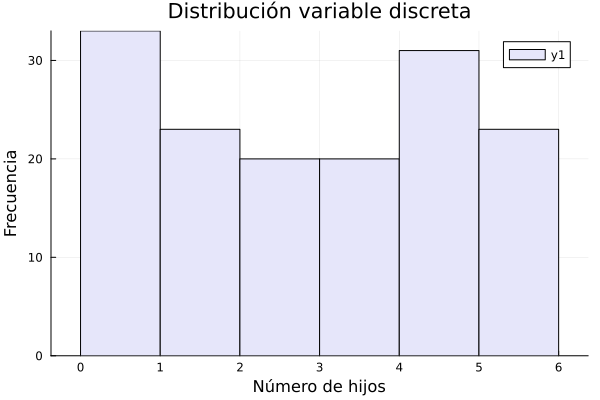

In [52]:

histogram(df.Discreta, bins=6, xlabel="Número de hijos", ylabel="Frecuencia",
           title="Distribución variable discreta", color=:lavender)


df.Discreta → son los datos (número de hijos).

bins=6 → divide el eje en 6 grupos (de 0 a 5 hijos).

xlabel y ylabel → ponen los nombres de los ejes (“Número de hijos” y “Frecuencia”).

title → agrega el título del gráfico.

color=:lavender → pinta las barras de color lavanda.

El gráfico muestra cuántas personas hay en cada categoría de hijos (0, 1, 2, …, 5), es decir, la distribución de esa variable discreta.

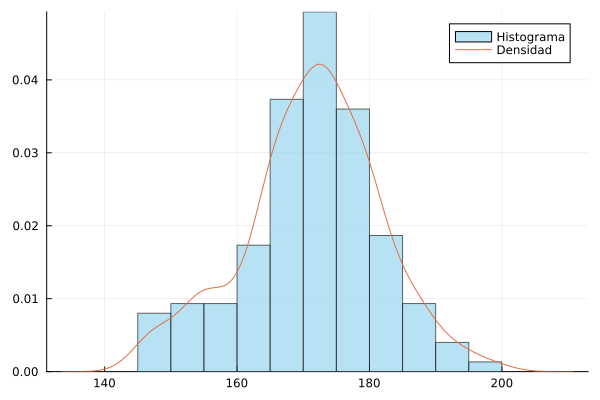

In [53]:

histogram(df.Continua, bins=15, normalize=true, alpha=0.6, label="Histograma", color=:skyblue)
density!(df.Continua, label="Densidad")


histogram(df.Continua, bins=15, normalize=true, alpha=0.6, label="Histograma", color=:skyblue)

Hace un histograma de la variable continua.

bins=15 → divide los datos en 15 intervalos.

normalize=true → convierte las frecuencias a proporciones (así el área total = 1).

alpha=0.6 → hace las barras semitransparentes.

label="Histograma" → aparece en la leyenda.

color=:skyblue → barras en azul cielo.

density!(df.Continua, label="Densidad")

Sobre el histograma se dibuja la curva de densidad suavizada (una línea continua).

Sirve para ver mejor la forma de la distribución.

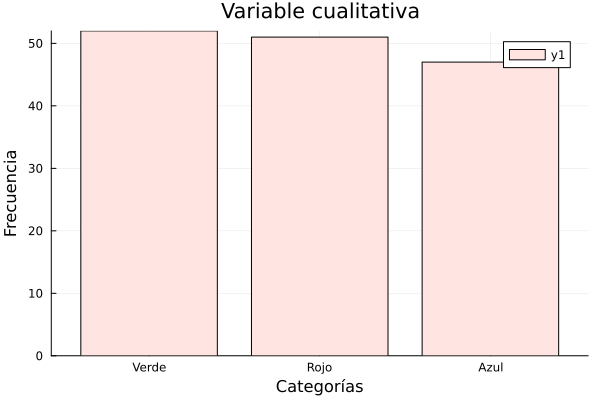

In [54]:

bar(countmap(df.Cualitativa), xlabel="Categorías", ylabel="Frecuencia",
    title="Variable cualitativa", color=:mistyrose)


bar(countmap(df.Cualitativa), ...) → hace un gráfico de barras usando los datos de la variable cualitativa.

countmap(df.Cualitativa) cuenta cuántas veces aparece cada color (Rojo, Azul, Verde).

Opciones del gráfico:

xlabel="Categorías" → nombre del eje X.

ylabel="Frecuencia" → nombre del eje Y.

title="Variable cualitativa" → título del gráfico.

color=:mistyrose → barras de color rosado claro.

#  <span style="color:plum">Interpretacion de Resultados</span>

- **Discreta**: La media y la desviación estándar indican la distribución del número de hijos.
- **Continua**: La altura se centra alrededor de 170 cm con dispersión aproximada de ±10 cm.
- **Cualitativa**: Se observa la frecuencia de cada categoría, mostrando cuál es la más y menos común.
